In [504]:
#Import packages

import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

In [505]:
# Set the Path
whale_returns_path = Path("02-Homework_04-Pandas_Instructions_Starter_Code_Resources_whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_returns.sort_index(inplace=True)
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [506]:
# Clean Data
whale_returns = whale_returns.dropna()

In [507]:
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [508]:
# Set the Path
algo_returns_path = Path("02-Homework_04-Pandas_Instructions_Starter_Code_Resources_algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_returns.sort_index(inplace=True)
algo_returns

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [509]:
# Clean Data
algo_returns = algo_returns.dropna()

In [510]:
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [511]:
# Set the Path

SP_500_Path = Path("02-Homework_04-Pandas_Instructions_Starter_Code_Resources_sp500_history.csv")
SP500_returns = pd.read_csv(SP_500_Path, index_col='Date', parse_dates=True, infer_datetime_format=True)
SP500_returns.sort_index(inplace=True)
SP500_returns

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [512]:
# Check Data Type
SP500_returns.dtypes

Close    object
dtype: object

In [513]:
# Remove $ sign from the SP500 dataset and convert to float

SP500_returns["Close"] = SP500_returns["Close"].str.replace("$","")
SP500_returns["Close"] = SP500_returns["Close"].astype(float)
SP500_returns

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [514]:
# Clean data 
SP500_returns["daily_returnsSP"] = SP500_returns.pct_change().dropna()

In [515]:
# Rename Column
SP500_returns = SP500_returns.rename(columns={'Close': 'Close S&P500'})

In [516]:
# Combine DataSet
df_combined = pd.concat([whale_returns, algo_returns, SP500_returns], axis="columns", join="inner")

In [517]:
# Drop Close Price Column 
df_combined.drop(['Close S&P500'], axis=1, inplace=True)

In [518]:
# Show the concatenation
df_combined

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,daily_returnsSP
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


In [ ]:
# Eliminate hours in the index to have only dates left
df_combined2.index = df_combined2.index.date

In [520]:
df_combined = df_combined2

<AxesSubplot:>

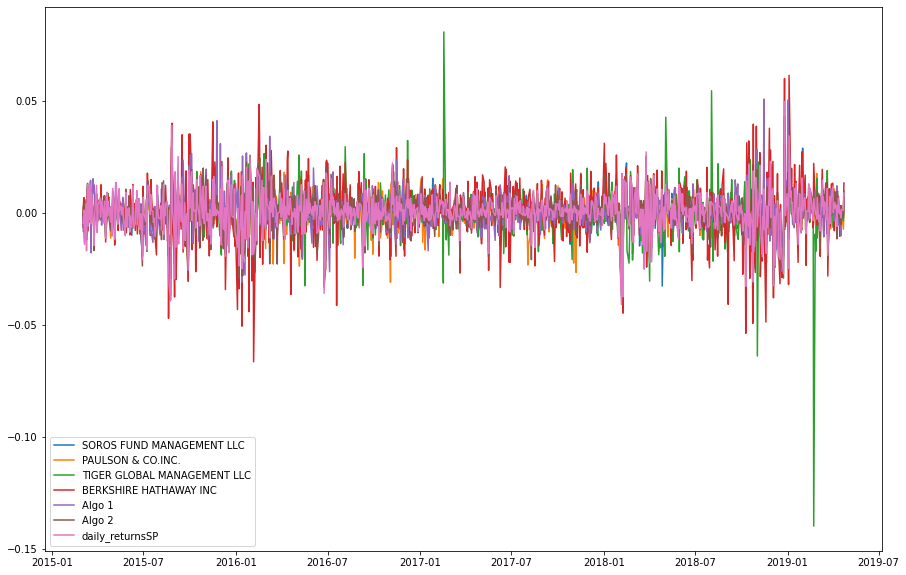

In [521]:
df_combined.plot(figsize=(15,10))

In [522]:
# Cumulative product of the Portfolios
returns_portfolios = (1+df_combined).cumprod()

In [523]:
returns_portfolios

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,daily_returnsSP
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.995461
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.991093
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.992278
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.978214
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.982072
...,...,...,...,...,...,...,...
2019-04-16,1.160965,0.786811,0.862080,1.526861,1.944990,1.267768,1.372945
2019-04-17,1.157602,0.781723,0.858279,1.531781,1.924954,1.261140,1.369823
2019-04-18,1.159278,0.782678,0.858778,1.534716,1.923823,1.259590,1.371986
2019-04-22,1.156280,0.776939,0.855652,1.533046,1.925124,1.257151,1.373375


<AxesSubplot:>

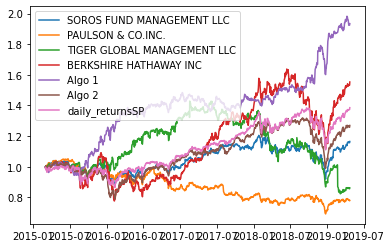

In [524]:
returns_portfolios.plot()

<AxesSubplot:>

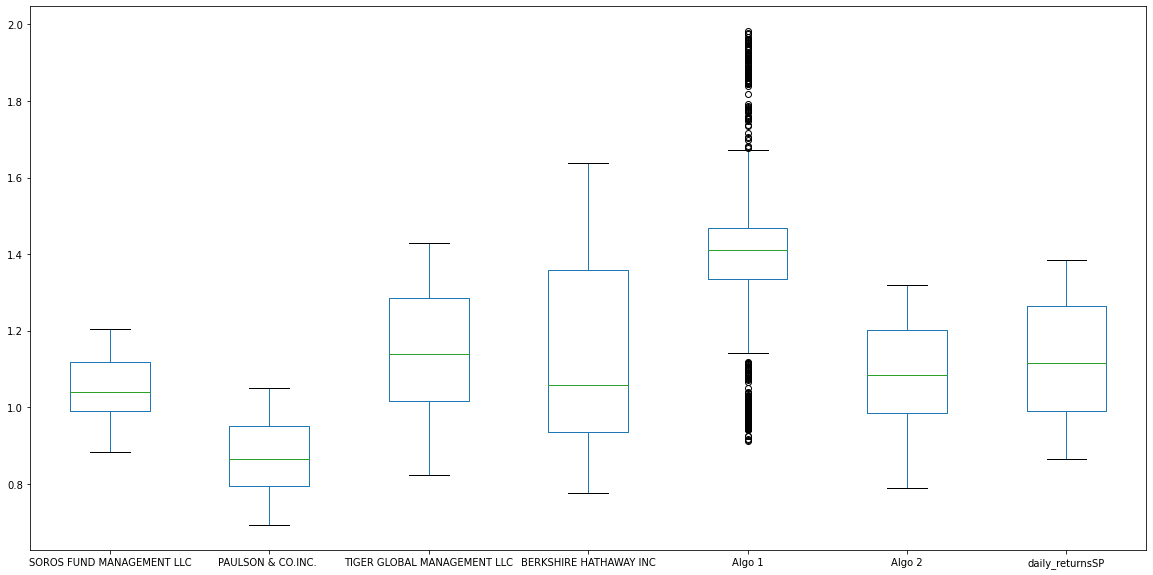

In [525]:
returns_portfolios.plot.box(figsize= (20,10))

In [526]:
# Portfolios Standard Deviation
df_combined_std = df_combined.std()

In [527]:
df_combined_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
daily_returnsSP                0.008554
dtype: float64

In [528]:
# Standard Deviation SP500
SP_500_std = df_combined["daily_returnsSP"].std()

In [529]:
# Which Portfolio has SD higher than SP500
df_combined_std > SP_500_std

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
daily_returnsSP                False
dtype: bool

In [530]:
###### TIGER GLOBAL MANAGEMENT LLC and BERKSHIRE HATHAWAY INC are riskier than SP500

In [531]:
# Calculate Annualized SD
annualized_std = df_combined_std * np.sqrt(252)

In [532]:
annualized_std.head()

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
dtype: float64

In [533]:
# 20days moving average SD
portfolio_std_moving_av = df_combined.rolling(window=21).std()

In [534]:
portfolio_std_moving_av.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,daily_returnsSP
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006498
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006537
2019-04-18,0.006633,0.006303,0.007328,0.009475,0.005834,0.007172,0.006470
2019-04-22,0.005915,0.006400,0.006197,0.009104,0.005831,0.007113,0.006094
2019-04-23,0.004315,0.005695,0.004949,0.006602,0.005889,0.005582,0.004325


<AxesSubplot:>

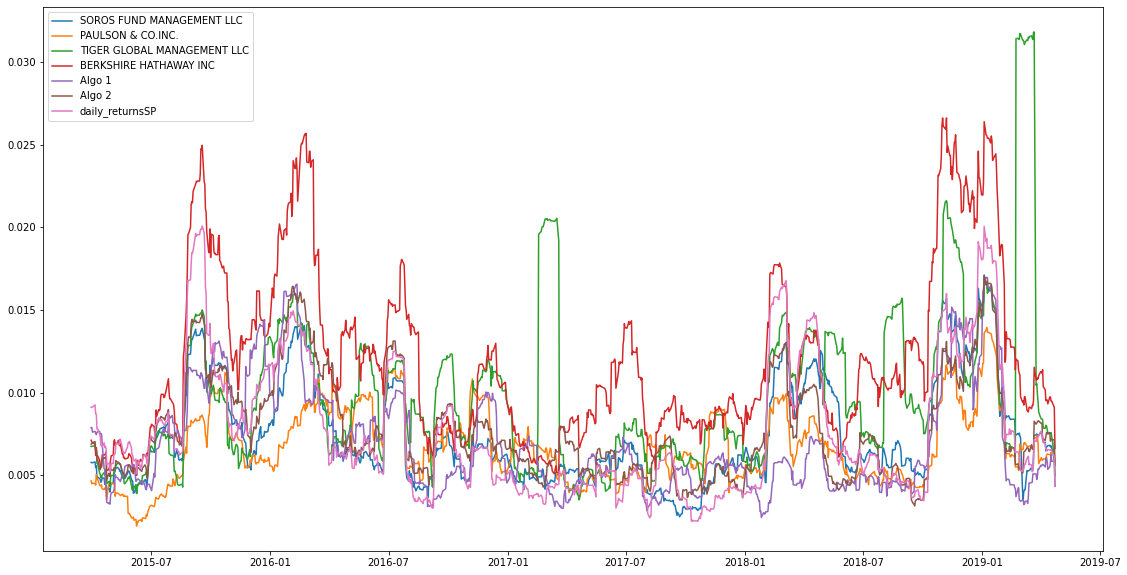

In [535]:
portfolio_std_moving_av.plot(figsize=(19,10))

In [536]:
# Calculate Correlation Portfolios
correlation_portfolio = df_combined.corr()
correlation_portfolio

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,daily_returnsSP
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
daily_returnsSP,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [537]:
#Calculate Covariance Between SOROS FUND MANAGEMENT LLC and SP500
rolling_whale_returns_cov = df_combined['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(df_combined['daily_returnsSP'])

In [538]:
rolling_whale_returns_cov

2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.000035
2019-04-17    0.000031
2019-04-18    0.000031
2019-04-22    0.000031
2019-04-23    0.000030
Length: 1043, dtype: float64

In [539]:
# SP500 Variance
SP_500_var = df_combined['daily_returnsSP'].rolling(window=60).var()

In [540]:
SP_500_var

2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.000041
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
2019-04-23    0.000037
Name: daily_returnsSP, Length: 1043, dtype: float64

In [541]:
# Calculate Beta of the Whale Portfolio
beta_portf = rolling_whale_returns_cov/SP_500_var
beta_portf

2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.840772
2019-04-17    0.822868
2019-04-18    0.823598
2019-04-22    0.825137
2019-04-23    0.806330
Length: 1043, dtype: float64

In [542]:
# Calculate annualized Sharpe Ratio
annualized_sr = (df_combined.mean()*252)/annualized_std

In [543]:
annualized_sr

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
daily_returnsSP                0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

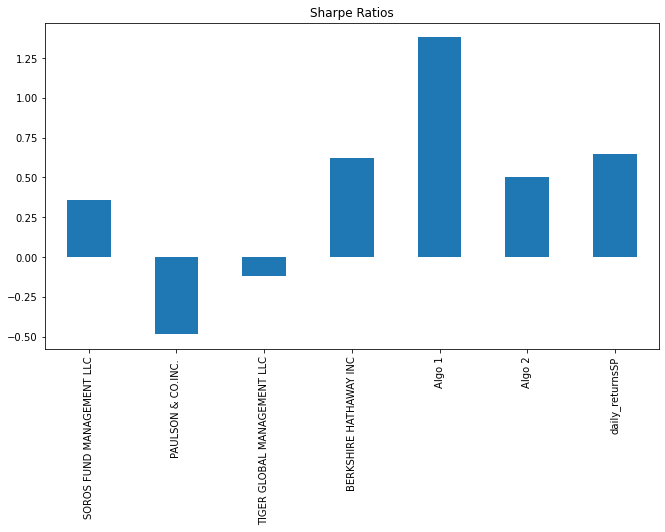

In [544]:
annualized_sr.plot.bar(title='Sharpe Ratios', figsize=(11,6))

In [545]:
# Set the Path
axs_path = Path("Axis_data.csv")
axis_returns = pd.read_csv(axs_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
axis_returns.sort_index(inplace=True)
axis_returns

,Close
Date,
2015-03-03 16:00:00,51.85
2015-03-04 16:00:00,50.85
2015-03-05 16:00:00,50.93
2015-03-06 16:00:00,51.49
2015-03-09 16:00:00,51.50
...,...
2019-04-15 16:00:00,56.90
2019-04-16 16:00:00,57.17
2019-04-17 16:00:00,56.73


In [546]:
# Set the Path
msft_path = Path("Msft_data.csv")
msft_returns = pd.read_csv(msft_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
msft_returns.sort_index(inplace=True)
msft_returns

,Close
Date,
2015-03-03 16:00:00,43.28
2015-03-04 16:00:00,43.06
2015-03-05 16:00:00,43.11
2015-03-06 16:00:00,42.36
2015-03-09 16:00:00,42.85
...,...
2019-04-15 16:00:00,121.05
2019-04-16 16:00:00,120.77
2019-04-17 16:00:00,121.77


In [547]:
# Set the Path
fb_path = Path("FB_data.csv")
fb_returns = pd.read_csv(fb_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
fb_returns.sort_index(inplace=True)
fb_returns

,Close
Date,
2015-03-03 16:00:00,79.60
2015-03-04 16:00:00,80.90
2015-03-05 16:00:00,81.21
2015-03-06 16:00:00,80.01
2015-03-09 16:00:00,79.44
...,...
2019-04-15 16:00:00,179.65
2019-04-16 16:00:00,178.87
2019-04-17 16:00:00,178.78


In [548]:
# Set the Path
TX60_path = Path("TX60_data.csv")
tx60_returns = pd.read_csv(TX60_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
tx60_returns.sort_index(inplace=True)
tx60_returns

,Close
Date,
2015-03-03 16:00:00,883.53
2015-03-04 16:00:00,880.39
2015-03-05 16:00:00,882.78
2015-03-06 16:00:00,874.51
2015-03-09 16:00:00,869.01
...,...
2019-04-15 16:00:00,987.92
2019-04-16 16:00:00,988.51
2019-04-17 16:00:00,990.61


In [549]:
#Calculate daily returns
fb_returns["Close"] = fb_returns.pct_change()

In [550]:
msft_returns["Close"] = msft_returns.pct_change()

In [551]:
axis_returns["Close"] = axis_returns.pct_change()

In [552]:
tx60_returns["Close"] = tx60_returns.pct_change()

In [553]:
tx60_returns.index = tx60_returns.index.date
tx60_returns = tx60_returns.rename(columns={'Close': 'TX_60_ret'})

In [554]:
# Concatenate all stocks into a single DataFrame
df_my_combined = pd.concat([fb_returns, msft_returns, axis_returns], axis="columns", join="inner")

In [555]:
df_my_combined.index = df_my_combined.index.date

In [472]:
# Sort datetime index in ascending order (past to present)
df_my_combined.sort_index(inplace=True)
# Set column names
df_my_combined.columns = ['FB', 'MSFT', 'AXS']
# Display a few rows
df_my_combined.tail()

,FB,MSFT,AXS
2019-04-15,0.003071,0.000827,0.002643
2019-04-16,-0.004342,-0.002313,0.004745
2019-04-17,-0.000503,0.008280,-0.007696
2019-04-18,-0.002797,0.013140,0.004583
2019-04-22,0.017725,0.003161,-0.004913


In [473]:
# Clean Data
df_my_combined.dropna(inplace=True)
df_my_combined.tail()

,FB,MSFT,AXS
2019-04-15,0.003071,0.000827,0.002643
2019-04-16,-0.004342,-0.002313,0.004745
2019-04-17,-0.000503,0.008280,-0.007696
2019-04-18,-0.002797,0.013140,0.004583
2019-04-22,0.017725,0.003161,-0.004913


In [474]:
# Set Weights of stocks in our portfolio
weights = [1/3, 1/3, 1/3]
my_portf_weighted_ret = df_my_combined.dot(weights)
my_portf_weighted_ret.tail()

2019-04-15    0.002180
2019-04-16   -0.000637
2019-04-17    0.000027
2019-04-18    0.004975
2019-04-22    0.005324
dtype: float64

In [475]:
my_portf_weighted_ret = my_portf_weighted_ret.rename("MyPortfolio")

In [476]:
my_portf_weighted_ret

2015-03-04   -0.002679
2015-03-05    0.002189
2015-03-06   -0.007059
2015-03-09    0.001546
2015-03-10   -0.022206
                ...   
2019-04-15    0.002180
2019-04-16   -0.000637
2019-04-17    0.000027
2019-04-18    0.004975
2019-04-22    0.005324
Name: MyPortfolio, Length: 1041, dtype: float64

In [477]:
# Concatenate old portfolios and my portfolio
df_combined_2 = pd.concat([df_combined, my_portf_weighted_ret, tx60_returns], axis="columns", join='inner')
df_combined_2

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,daily_returnsSP,MyPortfolio,TX_60_ret
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.002679,-0.003554
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.002189,0.002715
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.007059,-0.009368
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.001546,-0.006289
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961,-0.022206,-0.014522
...,...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000629,0.002180,0.003311
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,-0.000637,0.000597
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.000027,0.002124
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.004975,0.004724


In [478]:
# SD of the Portfolios
df_combined_2_std = df_combined_2.std()

In [479]:
# Annualized SD
df_combined_2_annualized_std = df_combined_2 * np.sqrt(252)

<AxesSubplot:>

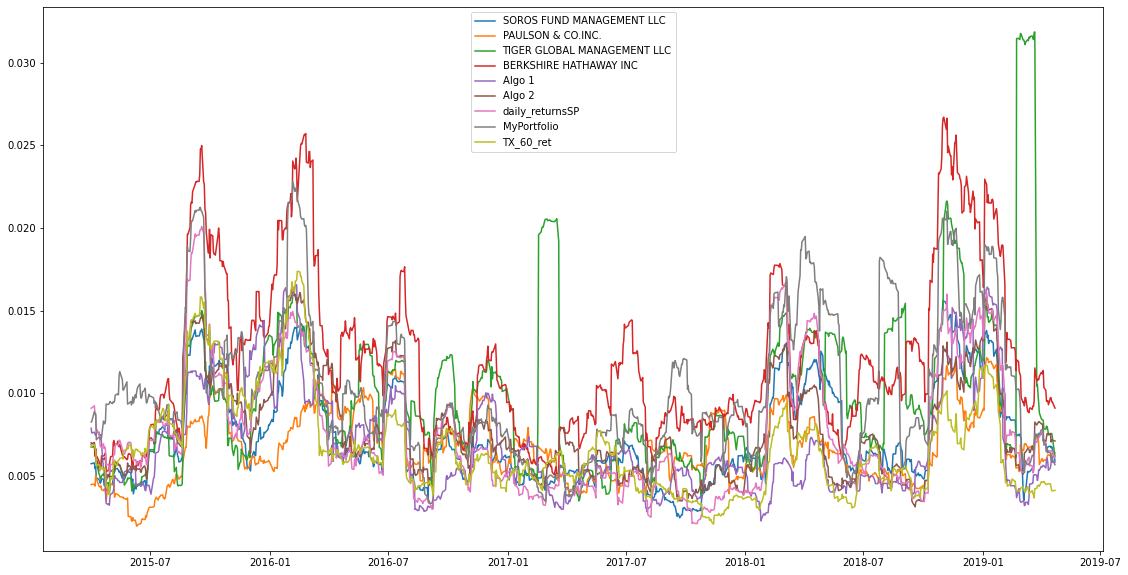

In [480]:
# 21 days moving average SD
df_combined_2_std_moving_av = df_combined_2.rolling(window=21).std()
df_combined_2_std_moving_av.plot(figsize=(19,10))

<AxesSubplot:>

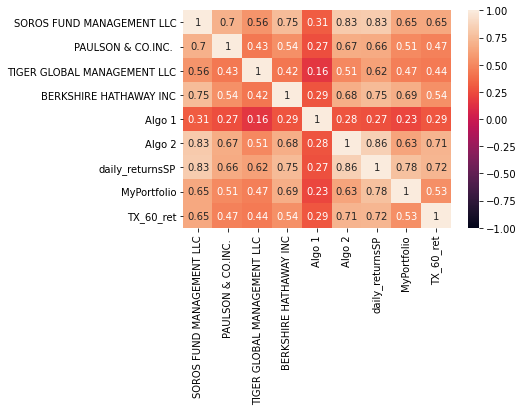

In [481]:
#Calculate Correlation
correlation_2 = df_combined_2.corr()
sns.heatmap(correlation_2,  vmin=-1, vmax=1,annot=True)

In [483]:
# Covariance between My Portfolio and TX_60
my_portf_cov = df_combined_2['MyPortfolio'].rolling(window=60).cov(df_combined_2['TX_60_ret'])
my_portf_cov

2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
2015-03-10         NaN
                ...   
2019-04-15    0.000013
2019-04-16    0.000012
2019-04-17    0.000009
2019-04-18    0.000009
2019-04-22    0.000009
Length: 1021, dtype: float64

In [485]:
# 60 days rolling average Variance TX_60
var_TX60 = df_combined_2['TX_60_ret'].rolling(window=60).var()
var_TX60

2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
2015-03-10         NaN
                ...   
2019-04-15    0.000018
2019-04-16    0.000018
2019-04-17    0.000016
2019-04-18    0.000016
2019-04-22    0.000016
Name: TX_60_ret, Length: 1021, dtype: float64

In [487]:
# Beta My Portfolio
beta_my_portf = my_portf_cov/var_TX60
beta_my_portf

2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
2015-03-10         NaN
                ...   
2019-04-15    0.690989
2019-04-16    0.664681
2019-04-17    0.566384
2019-04-18    0.560828
2019-04-22    0.551696
Length: 1021, dtype: float64

<AxesSubplot:title={'center':'My Portfolio Beta'}>

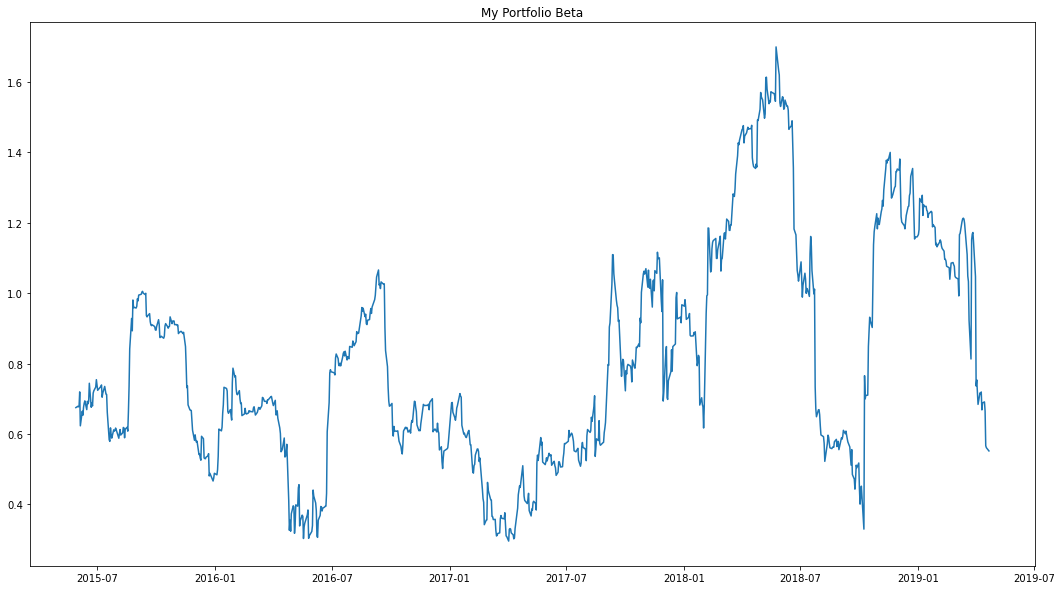

In [491]:
beta_my_portf.plot(title="My Portfolio Beta", figsize=(18,10))

In [499]:
#Sharpe Ratios combined portfolios
combined_portfolios_2_sharpe_ratios = (df_combined_2.mean() * 252) / (df_combined_2.std() * np.sqrt(252))

In [500]:
combined_portfolios_2_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.268060
PAULSON & CO.INC.             -0.565059
TIGER GLOBAL MANAGEMENT LLC   -0.155531
BERKSHIRE HATHAWAY INC         0.458311
Algo 1                         1.477443
Algo 2                         0.397207
daily_returnsSP                0.510633
MyPortfolio                    0.928816
TX_60_ret                      0.263883
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios 2'}>

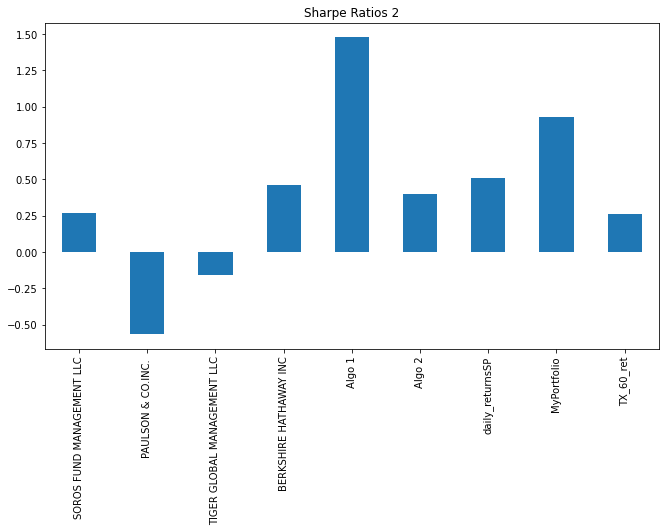

In [501]:
combined_portfolios_2_sharpe_ratios.plot.bar(title='Sharpe Ratios 2', figsize=(11,6))

In [ ]:
### My Portoflio performs very well compared to others!
## Only Algo 1 performs better 